Great overview of GraphML: http://graphml.graphdrawing.org/primer/graphml-primer.html

GraphML chapter from "Handbook of Graph Drawing and Visualization" (2013):  
https://cs.brown.edu/people/rtamassi/gdhandbook/chapters/graphml.pdf


There are not a lot of Python packages supporting GraphML

In [1]:
!pip install pygraphml # https://github.com/hadim/pygraphml/

In [2]:
!pip install xmlschema

In [3]:
import pygraphml # https://github.com/hadim/pygraphml/
import networkx as nx # graph creation and visualization
import glob # finding files
import lxml # for validation of XML
import xmlschema # for validation of XML

# generate graphs using NetworkX

As of 2012, NetworkX does not support drawing nested graphs; see https://groups.google.com/g/networkx-discuss/c/i-2jLelRDCA/m/Q-R2M3Ab9mQJ

In [4]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.lollipop_graph.html
candy_count = 8
stick_length = 4
G = nx.lollipop_graph(m=candy_count,n=stick_length) # m is the candy; n is the stick

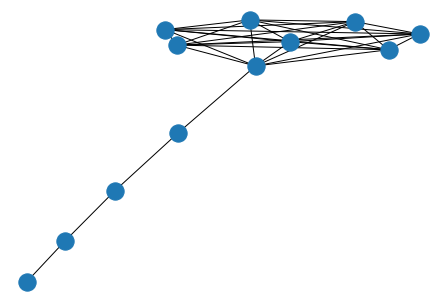

In [5]:
# https://networkx.org/documentation/stable/reference/drawing.html

nx.draw(G)

### write and read GraphML and NetworkX

In [6]:
# https://networkx.org/documentation/stable/reference/readwrite/graphml.html

nx.write_graphml(G, 'lollipop_with_stick_'+str(stick_length)+'_and_candy_'+str(candy_count)+'.xml')

In [7]:
list_of_lollipops = glob.glob('lollipop_*.xml')
H = nx.read_graphml(list_of_lollipops[0])

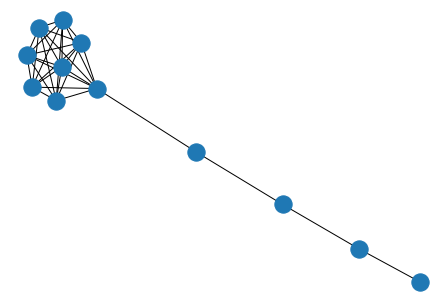

In [8]:
nx.draw(H)

### nested graphs in NetworkX

Given the nested graph provided on http://graphml.graphdrawing.org/primer/nested.graphml, 
NetworkX does not seem to detect the nodes (which is a surprise)
and NetworkX does not render the nested graph (as explained [here](https://groups.google.com/g/networkx-discuss/c/i-2jLelRDCA/m/rr3apXwhywsJ)). 

In [9]:
J = nx.read_graphml('nested_graph.xml')

In [10]:
# not clear why 'n5::n0' and 'n5::n1' and 'n6::n0::n0' are not presented
J.nodes

NodeView(('n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n5::n2', 'n6::n1'))

In [11]:
J.edges

EdgeView([('n0', 'n5::n2'), ('n0', 'n2'), ('n0', 'n1'), ('n1', 'n3'), ('n2', 'n3'), ('n2', 'n4'), ('n3', 'n6::n1'), ('n4', 'n6::n1')])

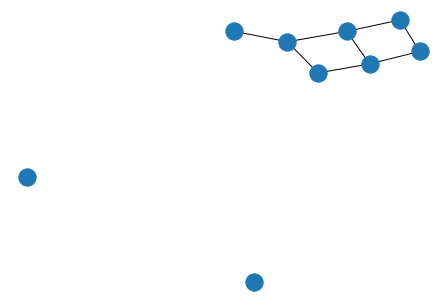

In [12]:
# Since this does not work, GraphViz might be a better route
nx.draw(J)

# pygraphml: what is it good for?

The documentation 
https://github.com/hadim/pygraphml/blob/master/notebooks/documentation.ipynb 
does not show how to created nested graphs. "nested" doesn't show up in the source code.

https://stackoverflow.com/questions/27487872/processing-yed-graphml-file-in-python

https://github.com/IBM/pyflowgraph/blob/master/flowgraph/core/graphml.py

https://stackoverflow.com/questions/52418704/write-nested-network-in-file-e-g-gml-graphml-or-nnf-using-networkx

# XML Schema

http://graphml.graphdrawing.org/specification/xsd.html

http://graphml.graphdrawing.org/specification/schema_element.xsd.htm

# validation using lxml


https://lxml.de/validation.html

In [13]:
# XSD from https://schemas.liquid-technologies.com/graphml/1.0/?page=graphml.html
xsd_path = "graphml-attributes.xsd"

xml_path = list_of_lollipops[0]

In [14]:
# https://stackoverflow.com/a/37972081/1164295

xmlschema_doc = lxml.etree.parse(xsd_path)

loaded_schema_correctly = False
try:
    xmlschema = lxml.etree.XMLSchema(xmlschema_doc)
    loaded_schema_correctly = True
except lxml.etree.XMLSchemaParseError as e:
    print("Loading schema failed.")
    print(e)
    
xml_doc = lxml.etree.parse(xml_path)

if loaded_schema_correctly:
    result = xmlschema.validate(xml_doc)
    print(result)


Loading schema failed.
attribute use (unknown), attribute 'ref': The QName value '{http://www.w3.org/1999/xlink}href' does not resolve to a(n) attribute declaration., line 662


# validation using xmlschema

https://pypi.org/project/xmlschema/

https://xmlschema.readthedocs.io/en/latest/usage.html

In [15]:
# https://stackoverflow.com/a/52310735/1164295

# not clear whether anything is being done
res = xmlschema.validate(list_of_lollipops[0], xsd_path)

In [16]:
print(type(res))

<class 'NoneType'>
